In [1]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [2]:
username = "vamshikrsna"
api_key = "QUYESye4KBDthvxxhbgU"

In [3]:
tls.set_credentials_file(username = username, api_key = api_key)

### Importing necessary libraries

In [4]:
import opendatasets as od
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import numpy as np
import statistics as st
import plotly.express as px
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from IPython.display import JSON
import isodate
from sklearn import metrics
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from plotly.subplots import make_subplots


warnings.filterwarnings('ignore')

### Loading the dataset from the source

In [95]:
dataset = 'https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv'

od.download(dataset, data_dir='..')

final_dir = '../youtube-trending-video-dataset/US_youtube_trending_data.csv'

Skipping, found downloaded files in "..\youtube-trending-video-dataset" (use force=True to force download)


In [96]:
data = pd.read_csv(final_dir)

data.head(3)

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...

In [97]:
data.shape

(185990, 16)

### Understanding the data

In [98]:
# Checking null values

def null_values(df):
    temp = df.isna().sum()
    temp_1 = round(temp * 100 / df.shape[0], 2)
    
    return pd.DataFrame((temp, temp_1), index = ['Count', 'Percentage']).T.sort_values('Count', ascending = False)


null_df = null_values(data).reset_index().rename({'index':'Column_name'}, axis =1)
null_df

Column_name   Count  Percentage
0         description  4048.0        2.18
1            video_id     0.0        0.00
2               title     0.0        0.00
3         publishedAt     0.0        0.00
4           channelId     0.0        0.00
5        channelTitle     0.0        0.00
6          categoryId     0.0        0.00
7       trending_date     0.0        0.00
8                tags     0.0        0.00
9          view_count     0.0        0.00
10              likes     0.0        0.00
11           dislikes     0.0        0.00
12      comment_count     0.0        0.00
13     thumbnail_link     0.0        0.00
14  comments_disabled     0.0        0.00
15   ratings_disabled     0.0        0.00

We can see that there are around 10% missing values in `description` column
- We are keeping the `description` column as it is while analysis and perform the null value treatment during model building.

In [99]:
# Checking the shape of the DataFrame
data.shape

(185990, 16)

In [100]:
# Let's check the unique video_ids in the `video_id` column
data['video_id'].nunique()

34066

- There are only 34066 unique videos out of 185990 video ids.
- That means there might be some duplicate data. Let's check if there is any.

In [101]:
# This code shows an example of how a randomly chosen video_id has continuous trending_dates

example_id = data['video_id'].value_counts().sort_values(ascending = False).index[np.random.randint(10,20)]

data[data['video_id'] == example_id]

video_id                                              title  \
120793  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
120997  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
121215  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
121674  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
121890  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
122096  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
122320  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
122528  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
122732  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
122919  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
123109  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
123309  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
123534  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
123739  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
123935  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
124140  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
124367  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
124565  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
124767  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
124980  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
125173  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
125386  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
125585  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
125987  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
126174  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   
126987  F-kvFACZ5yE  Denzel Washington Reveals the Aftermath of Wil...   

                 publishedAt                 channelId channelTitle  \
120793  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
120997  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
121215  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
121674  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
121890  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
122096  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
122320  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
122528  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
122732  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
122919  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
123109  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
123309  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
123534  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
123739  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
123935  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
124140  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
124367  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
124565  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
124767  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
124980  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
125173  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
125386  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
125585  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
125987  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
126174  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   
126987  2022-04-03T14:58:54Z  UCjQbTcszB-gRhDByY9WhySw   T.D. Jakes   

        categoryId         trending_date  \
120793          29  2022-04-04T00:00:00Z   
120997

We can see that there has been no change in data in any fields except the trending date column, since the video has been continuously present in the trending list since the published date only the trending date is getting updated everyday.

- We also observed that the data has certain important columns missing in it. Such as `VideoDuration` and `Comments` of video which are very useful for further analysis.
- We used `video_id` to extract the data from `YOUTUBE API`.
- The link for the Youtube API is: https://developers.google.com/youtube/v3/quickstart/python

### Extracting `Duration` and `Comments` from Youtube API

In [102]:
# First let's get unique video ids from the video_id column in dataframe

videos_list = data['video_id'].unique()

In [103]:
# The API_KEY is not displayed for security purposes

api_key = "*********************************"

In [104]:
# This fuction is used to extract 'Duration' and 'Comments' of a provided video_id

def get_video_info(vid_id, api_key):
    api_service_name = "youtube"
    api_version = "v3"

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey=api_key)

    request = youtube.videos().list(
        part="snippet,contentDetails,statistics,status",
        id=vid_id
    )
    
    response = request.execute()
    
    info_temp = []
    info_temp.append(vid_id)
    info_temp.append(response['items'][0]['contentDetails']['duration'])
    info_temp.append(response['items'][0]['status']['madeForKids'])
    
    youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey = api_key)

    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId=vid_id,
        textFormat = "plainText",
        order = "relevance"
    )
    response_comments = request.execute()
    
    info_temp.append([response_comments['items'][i]['snippet']['topLevelComment']['snippet']['textOriginal'] for i in range(20)])
    
    
    return info_temp



# This function is used to create a dataframe from the list of video_ids in video_list and save it in the repository.
# Start and end number is the range of video_ids you want the data for.

def data_to_csv(videos_list, start_number, end_number):
    print("Code Running")
    video_info = []
    deleted_videos = []
    
    for vid_id in videos_list[start_number : end_number]:
        try:
            video_info.append(get_video_info(vid_id, api_key))
        except:
            deleted_videos.append(vid_id)
    
    print("Number of videos extracted =", len(video_info))
    print("Number of video deleted =", len(deleted_videos))
    
    df = pd.DataFrame(video_info, columns = ['video_id', 'Duration', 'madeForKids', 'Comments'])
    df.to_csv('./YoutubeDataFiles/Data_' + str(start_number) + '_' + str(end_number) + '.csv')
    
    
# Saving the data to a .csv file by calling the funciton

#data_to_csv(videos_list, 0, 5000)

- Although it was possible to extract all the video_ids at once. It would cost money if you were to extract more than 5000.
- Hence, we used different API_KEYS and various start & end_numbers to save the files in the repository.
- The files are stored in `./YoutubeDataFiles` directory.
- The .csv files follow the convention `Data_startnumber_endnumber.csv`.

In [105]:
# Let's read the 'extracted files' in and merge them to merge with original Dataframe

extracted_df = pd.concat([pd.read_csv('./YoutubeDataFiles/' + file_csv, index_col = 0) for file_csv in os.listdir('./YoutubeDataFiles')],
                          ignore_index = True)

extracted_df.columns = ['video_id', 'videoDuration', 'madeForKids', 'Comments']

extracted_df.head()

video_id videoDuration  madeForKids  \
0  3C66w5Z0ixs      PT18M38S        False   
1  M9Pmf9AB4Mo       PT2M18S        False   
2  J78aPJ3VyNs      PT22M10S        False   
3  kXLn3HkpjaA        PT1M1S        False   
4  VIUo6yapDbc      PT37M20S        False   

                                            Comments  
0  ['*Whether she moved on, whether she’s been se...  
1  ['She was fighting two squads and got flanked,...  
2  ["Let's see what memes you cooked up while I w...  
3  ['Which 2020 XXL Freshman is your favorite?', ...  
4  ['WE’RE SO OBSESSED!!!! Thank you guys times a...

In [106]:
# Checking the shape of the extracted dataset

extracted_df.shape

(31329, 4)

### Modifying the Original Dataframe

In [107]:
# Checking column name and values in the dataframe

data.head(1)

video_id                               title           publishedAt  \
0  3C66w5Z0ixs  I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11T19:20:14Z   

                  channelId channelTitle  categoryId         trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg     Brawadis          22  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   

   dislikes  comment_count                                  thumbnail_link  \
0      5855          35313  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   

                                         description  
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...

In [108]:
# Checking the datatypes of each column

data.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

Let's make the following changes to the Original Dataframe in 4 major steps:

1. Drop `channelId` column as it is not necessary for the analysis and prediction.
<br>

1. Convert `publishedAt` and `trending_date` to Pandas_Datetime object. Map each category_id to respective category in `categroty_id` column. This is done using `US_category_id.json` file from the source file.
<br>

2. Groupby `video_id` column and apply the following functions to the rest of the columns:
- `title` - <b>Function : MODE</b> - because title is same for each video_id.
- `publishedAT` - <b>Function : MODE</b> - although published date is same for each video_id. Let's consider minimum value.
- `channelTitle` - <b>Function : MODE</b> - because channel title is same for each video_id.
- `categroryId` - <b>Function : MODE</b> - because categoryId is same for each video_id.
- `trending_date` - <b>Function : [min(trending_date), max(trending_date)]</b> - this is because we can extract features like `How many days video took to trend` and `How many days the video have been trending`.
- `tags` - <b>Function : MODE</b> - because tags are same for each video_id.
- `likes` - <b>Function : [min(likes), max(likes)]</b> - this is because we can extract features like `How many likes have be increased during the period`.
- `comment_count` - <b>Function : [min(trending_date), max(trending_date)]</b> - this is because we can extract features like `Comments before and after trending`.
<br>
<br>
       
4. Drop `dislikes` column as the dislikes has been discontinued from November 2021.
Reference: https://www.google.com/search?q=when+did+youtube+remove+dislikes&rlz=1C1UEAD_enUS1037US1037&oq=when+did+youtube+remove+&aqs=chrome.0.0i512j69i57j0i512l6j0i22i30l2.6954j1j4&sourceid=chrome&ie=UTF-8



#### Step - 1

In [109]:
# Dropping channelId

data.drop(['channelId'], axis = 1, inplace = True)

# Validating the above code

data.head(3)

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   

            publishedAt   channelTitle  categoryId         trending_date  \
0  2020-08-11T19:20:14Z       Brawadis          22  2020-08-12T00:00:00Z   
1  2020-08-11T17:00:10Z   Apex Legends          20  2020-08-12T00:00:00Z   
2  2020-08-11T16:34:06Z  jacksepticeye          24  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2  jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   

   dislikes  comment_count                                  thumbnail_link  \
0      5855          35313  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg   
1      2794          16549  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg   
2      2628          40221  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   

                                         description  
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1  While running her own modding shop, Ramya Pare...  
2  I left youtube for a month and this is what ha...

#### Step - 2

- `publishedAt`, `trending_date` are object type. Let's convert it to Datetime format.

In [110]:
# Converting 'publishedAt' and 'trending_date' to datetime objects

data[['publishedAt', 'trending_date']] = data[['publishedAt', 'trending_date']].apply(lambda x: pd.to_datetime(x))

# Validating the above changes

data.dtypes[['publishedAt', 'trending_date']]

publishedAt      datetime64[ns, UTC]
trending_date    datetime64[ns, UTC]
dtype: object

We can see that `categoryId` column has id's of repective categories. We can access the description of categoryId from the `US_category_id.json` file.

In [111]:
# Let's import US_category_id.json file and map the category id's respectively

category_path = '../youtube-trending-video-dataset/US_category_id.json'


# Creating a dictionary object which stores the category id and its respective category
category_dict = {}

with open(category_path, 'r') as file:
    json_data = json.load(file)
    for item in json_data['items']:
        category_dict[int(item['id'])] = item['snippet']['title']
    
data['categoryId'] = data['categoryId'].apply(lambda x: category_dict[x])

# Validating the above code
data['categoryId'].head()

0    People & Blogs
1            Gaming
2     Entertainment
3             Music
4     Howto & Style
Name: categoryId, dtype: object

#### Step - 3 and 4

In [112]:
# This function converts list to min_max_list as per conditions specified in the above cell

def column_start_end(x: list) -> list:
    return [min(x), max(x)]

def description_col(x: list) -> str:
    temp = pd.Series(list(x))
    temp = temp[[not i for i in temp.isna()]]
    return temp.values[0] if len(temp) else ''

# Grouping by 'video_id' and aggregating using functions as specified in the above cell

modified_df = data.groupby('video_id').agg({'title':st.mode, 'publishedAt':np.min, 'channelTitle':st.mode, 'categoryId':st.mode,
              'trending_date': column_start_end, 'tags': st.mode, 'likes': column_start_end, 'view_count': column_start_end,
                'comment_count': column_start_end, 'comments_disabled': st.mode, 'ratings_disabled': st.mode,
                                           'description':description_col}).reset_index()

modified_df.head(2)

video_id                               title               publishedAt  \
0  --14w5SOEUs  Migos - Avalanche (Official Video) 2021-06-10 16:00:00+00:00   
1  --2O86Z0hsM            MY TESLA PAYS FOR ITSELF 2022-03-09 23:19:08+00:00   

  channelTitle     categoryId  \
0    MigosVEVO          Music   
1      jf.okay  Entertainment   

                                       trending_date  \
0  [2021-06-11 00:00:00+00:00, 2021-06-15 00:00:0...   
1  [2022-03-11 00:00:00+00:00, 2022-03-15 00:00:0...   

                                                tags             likes  \
0  Migos|Avalanche|Quality|Control|Music/Motown|R...  [122830, 262692]   
1                                             [None]    [16481, 17290]   

           view_count  comment_count  comments_disabled  ratings_disabled  \
0  [1076217, 6823249]  [9539, 16445]              False             False   
1    [466980, 538485]   [1278, 1439]              False             False   

                                         description  
0  Music video by Migos performing Avalanche. Qua...  
1

In [113]:
modified_df.shape

(34066, 13)

The resulting dataframe has 34066 rows and 10 columns.

Let's make the following changes to the resulting dataframe in 8 steps:
1. Create new columns `trending_date_start` & `trending_date_end` from `trending_date` column.
2. Create new columns `likes_start` & `likes_end` from `likes` column.
3. Create new columns `view_count_start` & `view_count_end` from `view_count` column.
3. `tags` have `[None]` values in it. Converting them to Null values.
4. Create new column `tagsCount` from `tags` column. Which indicates the number of tags used in particular video.
5. Create new column `hoursTakenToTrend` from `trending_date_start` & `publishedAt` columns.
6. Create new column `trendingDaysDuration` from `trending_date_end` & `trending_date_start` columns.
7. Drop columns `trending_date`, `likes`, `publishedAt`, `view_count` as they are no longer required.

#### Step - 1

In [24]:
# Create new columns trending_date_start & trending_date_end from trending_date column.

modified_df['trending_date_start'] = modified_df['trending_date'].apply(lambda x: min(x))
modified_df['trending_date_end'] = modified_df['trending_date'].apply(lambda x: max(x))

#### Step - 2

In [25]:
# Create new columns likes_start & likes_end from likes column.

modified_df['likes_start'] = modified_df['likes'].apply(lambda x: min(x))
modified_df['likes_end'] = modified_df['likes'].apply(lambda x: max(x))

#### Step - 3

In [26]:
# Create new columns `view_count_start` & `view_count_end` from `view_count` column.

modified_df['view_count_start'] = modified_df['view_count'].apply(lambda x: min(x))
modified_df['view_count_end'] = modified_df['view_count'].apply(lambda x: max(x))

#### Step - 4

In [27]:
# tags have [None] values in it. Converting them to Null values.

modified_df['tags'] = modified_df['tags'].apply(lambda x: x if x!= '[None]' else np.nan)

#### Step - 5

In [28]:
# Create new column tagsCount from tags column. Which indicates the number of tags used in particular video.

modified_df['tagCount'] = modified_df['tags'].apply(lambda x: 0 if type(x) == float else len(list(x.split('|'))))

#### Step - 6

In [29]:
# Create new column hoursTakenToTrend from trending_date_start & publishedAt columns.

modified_df['hoursTakenToTrend'] = round((modified_df['trending_date_start'] - modified_df['publishedAt']).dt.seconds/(60*60), 1)

#### Step - 7

In [30]:
# Create new column trendingDaysDuration from trending_date_end & trending_date_start columns.

modified_df['trendingDaysDuration'] = (modified_df['trending_date_end'] - modified_df['trending_date_start']).dt.days

#### Step - 8

In [31]:
# Create new columns `comment_count_start` & `comment_count_end` from `comment_count` column.

modified_df['comment_count_start'] = modified_df['comment_count'].apply(lambda x: min(x))
modified_df['comment_count_end'] = modified_df['comment_count'].apply(lambda x: max(x))

#### Step - 9

In [32]:
# Extracting the day of the week
modified_df['dayofweek'] = modified_df['publishedAt'].dt.day_name()

# Extracting published Year of each video
modified_df['Year'] = modified_df['publishedAt'].dt.year

# Extracting published month of each video
modified_df['Month'] = modified_df['publishedAt'].dt.month

In [33]:
# Drop columns trending_date, likes, publishedAt, view_count as they are no longer required.

modified_df.drop(['trending_date', 'likes', 'publishedAt', 'view_count', 'trending_date_start', 'trending_date_end', 'comment_count'], axis = 1, inplace = True)

In [34]:
# Displaying the dataframe after all the changes

modified_df.head(3)

video_id                                       title  \
0  --14w5SOEUs          Migos - Avalanche (Official Video)   
1  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF   
2  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys   

         channelTitle     categoryId  \
0           MigosVEVO          Music   
1             jf.okay  Entertainment   
2  Television Academy  Entertainment   

                                                tags  comments_disabled  \
0  Migos|Avalanche|Quality|Control|Music/Motown|R...              False   
1                                                NaN              False   
2                                                NaN              False   

   ratings_disabled                                        description  \
0             False  Music video by Migos performing Avalanche. Qua...   
1             False                                                      
2             False  Hannah Waddingham wins the Emmy for Supporting...   

   likes_start  likes_end  view_count_start  view_count_end  tagCount  \
0       122830     262692           1076217         6823249         8   
1        16481      17290            466980          538485         0   
2         6299       8029            527742          682609         0   

   hoursTakenToTrend  trendingDaysDuration  comment_count_start  \
0                8.0                     4                 9539   
1                0.7                     4                 1278   
2               22.9                     4                  586   

   comment_count_end  dayofweek  Year  Month  
0              16445   Thursday  2021      6  
1               1439  Wednesday  2022      3  
2                723     Monday  2021      9

In [35]:
# Displaying the datatypes of the resultant Dataframe

modified_df.dtypes

video_id                 object
title                    object
channelTitle             object
categoryId               object
tags                     object
comments_disabled          bool
ratings_disabled           bool
description              object
likes_start               int64
likes_end                 int64
view_count_start          int64
view_count_end            int64
tagCount                  int64
hoursTakenToTrend       float64
trendingDaysDuration      int64
comment_count_start       int64
comment_count_end         int64
dayofweek                object
Year                      int64
Month                     int64
dtype: object

In [36]:
# Changing video duration into seconds

extracted_df['videoDuration'] = extracted_df['videoDuration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

### Let's merge `modified_df` and `extracted_df`

In [37]:
# Merging 'modified_df' & 'extracted_df'

final_df = modified_df.merge(extracted_df, on = 'video_id', how = 'inner')

# Validating the above

final_df.head(2)

video_id                                       title  \
0  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF   
1  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys   

         channelTitle     categoryId tags  comments_disabled  \
0             jf.okay  Entertainment  NaN              False   
1  Television Academy  Entertainment  NaN              False   

   ratings_disabled                                        description  \
0             False                                                      
1             False  Hannah Waddingham wins the Emmy for Supporting...   

   likes_start  likes_end  ...  hoursTakenToTrend  trendingDaysDuration  \
0        16481      17290  ...                0.7                     4   
1         6299       8029  ...               22.9                     4   

   comment_count_start  comment_count_end  dayofweek  Year  Month  \
0                 1278               1439  Wednesday  2022      3   
1                  586                723     Monday  2021      9   

  videoDuration  madeForKids  \
0          17.0        False   
1         309.0        False   

                                            Comments  
0  ['Reminds me of the “ how do you know if someo...  
1  ["I get that she isn't a nobody, but to see so...  

[2 rows x 23 columns]

#### Creating new column like/view

In [38]:
final_df['like/view_start'] = round(final_df['likes_start'] / final_df['view_count_start'], 2)
          
final_df['like/view_end'] = round(final_df['likes_end'] / final_df['view_count_end'], 2)

In [39]:
# Checking the shape of the resulting dataset

final_df.shape

(31329, 25)

`videoDuration` column is in ISO Date format. Let's convert it into minutes

## Exploratory Data Analysis

In [40]:
# Checking the Dataframe

final_df.head(2)

video_id                                       title  \
0  --2O86Z0hsM                    MY TESLA PAYS FOR ITSELF   
1  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys   

         channelTitle     categoryId tags  comments_disabled  \
0             jf.okay  Entertainment  NaN              False   
1  Television Academy  Entertainment  NaN              False   

   ratings_disabled                                        description  \
0             False                                                      
1             False  Hannah Waddingham wins the Emmy for Supporting...   

   likes_start  likes_end  ...  comment_count_start  comment_count_end  \
0        16481      17290  ...                 1278               1439   
1         6299       8029  ...                  586                723   

   dayofweek  Year  Month  videoDuration  madeForKids  \
0  Wednesday  2022      3           17.0        False   
1     Monday  2021      9          309.0        False   

                                            Comments  like/view_start  \
0  ['Reminds me of the “ how do you know if someo...             0.04   
1  ["I get that she isn't a nobody, but to see so...             0.01   

   like/view_end  
0           0.03  
1           0.01  

[2 rows x 25 columns]

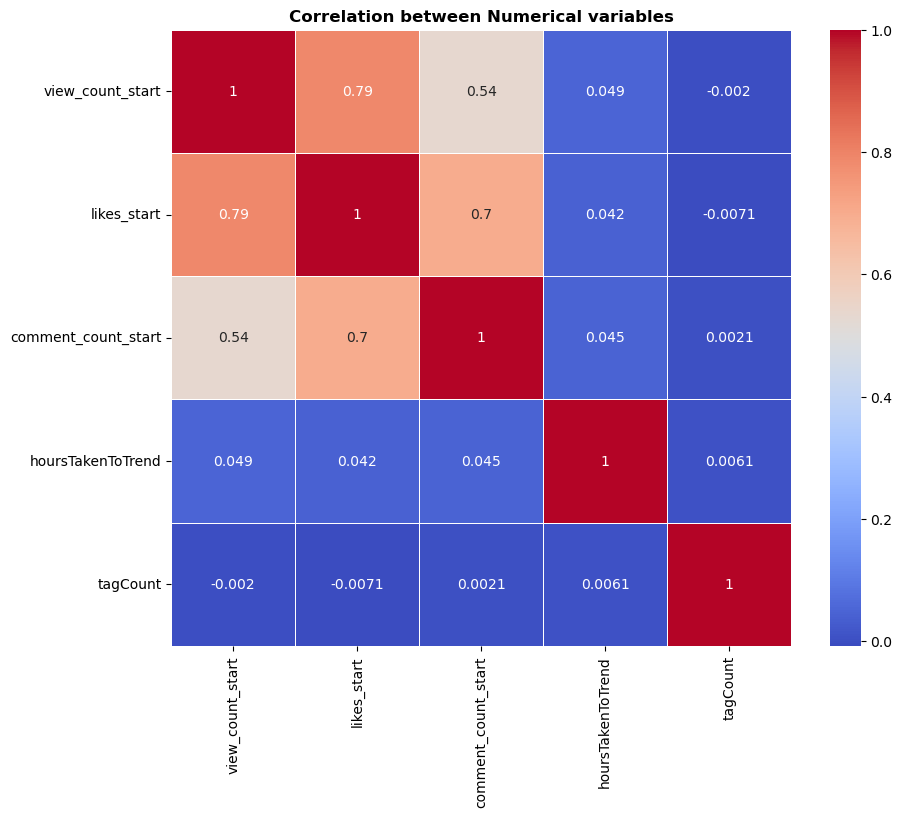

In [41]:
# Let's check the correlation between the numerical variables

plt.figure(figsize = (10, 8))
sns.heatmap(final_df[['view_count_start', 'likes_start', 'comment_count_start', 'hoursTakenToTrend', 'tagCount']].corr(), linewidths=.5, annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical variables", fontweight = 'bold')
plt.show()

In [42]:
sns.set_style('dark')
top_10 = final_df['channelTitle'].value_counts(ascending = False)[:10]

# Create the Plotly bar plot
fig = go.Figure(data=[go.Bar(
            x=top_10.index.values,
            y=top_10.values,
            marker=dict(
                color=top_10.values,
                colorscale='Viridis'
            )
        )])
fig.update_layout(
    title={
        'text': "Top 10 Channels that contain most number of trending videos",
        'font': {'size': 26, 'family': 'Arial', 'color': '#333'},
        'x': 0.5, 'xanchor': 'center'
    },
    xaxis_title={
        'text': "Channel Title",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    yaxis_title={
        'text': "Number of Trending Videos",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    xaxis_tickangle=-45,
    font=dict(
        family="Arial, monospace",
        size=16,
        color="#333"
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#f2f2f2'
)

# Custom hover template
fig.update_traces(hovertemplate="<b>%{x}</b><br>Number of Trending Videos: %{y}")

# Set colorbar for the marker colors
fig.update_layout(coloraxis=dict(colorbar=dict(title=dict(text="<b>Number of Trending Videos</b>"), thickness=20)))

fig.update_traces(hoverlabel=dict(namelength=0))

# Show the plot in the notebook
pio.show(fig)

In [49]:
py.plot(fig, filename = "Top 10 Channels that contain most number of trending videos", auto_open = False)

'https://plotly.com/~vamshikrsna/1/'

In [59]:
# Number of trending videos Category wise

# Group the data by categoryId and count the number of unique video ids
category_counts = final_df.groupby('categoryId')['video_id'].nunique().reset_index(name='count')

# Sort the values in descending order
category_counts = category_counts.sort_values(by='count', ascending=False)

# Create the Plotly bar plot
fig = go.Figure(data=[go.Bar(
            x=category_counts['categoryId'],
            y=category_counts['count'],
            marker=dict(
                color=category_counts['count'],
                colorscale='Viridis'
            )
        )])

# Set layout and styling options
fig.update_layout(
    title={
        'text': "Number of Trending Videos Category wise",
        'font': {'size': 26, 'family': 'Arial', 'color': '#333'},
        'x': 0.5, 'xanchor': 'center'
    },
    xaxis_title={
        'text': "Category ID",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    yaxis_title={
        'text': "Number of Trending Videos",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    font=dict(
        family="Arial, monospace",
        size=16,
        color="#333"
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#f2f2f2'
)

# Custom hover template
fig.update_traces(hovertemplate="<b>Category ID: %{x}</b><br>Number of Trending Videos: %{y}")

fig.update_traces(hoverlabel=dict(namelength=0))

# Set colorbar for the marker colors
fig.update_layout(coloraxis=dict(colorbar=dict(title=dict(text="<b>Number of Trending Videos</b>"), thickness=20)))

# Show the plot in the notebook
fig.show()


In [60]:
py.plot(fig, filename = "Number of Trending Videos Category wise", auto_open = False)

'https://plotly.com/~vamshikrsna/3/'

In [51]:
# Create box plot
box_data = [go.Box(x=final_df['hoursTakenToTrend'], 
                   boxpoints='outliers', 
                   marker=dict(color='indianred'),
                   orientation='h')]

# Create histogram
hist_data = [go.Histogram(x=final_df['hoursTakenToTrend'], nbinsx=24, marker=dict(color='steelblue'))]

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("Box Plot", "Histogram"))

# Add box plot to subplot 1
fig.add_trace(box_data[0], row=1, col=1)

# Add histogram to subplot 2
fig.add_trace(hist_data[0], row=2, col=1)

# Update subplot layout
fig.update_layout(height=600, width=800,
                  title='Number of hours taken by a video to get into trending list',
                  font=dict(family="Arial, monospace", size=18, color="#333"),
                  xaxis1=dict(title='Hours', tickvals=list(range(0, 24)), tickangle=90),
                  yaxis1=dict(title='Hours'),
                  yaxis2=dict(title='Count'),
                  showlegend=False,
                  paper_bgcolor='#f2f2f2',
                  plot_bgcolor='#f2f2f2')

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')

# Show the plot in the notebook
pio.show(fig)


In [52]:
py.plot(fig, filename = "Number of hours taken by a video to get into trending list", auto_open = False)

'https://plotly.com/~vamshikrsna/5/'

- The video gets into the trending list within a day(24 hours). This indicates that trending videos are updated every day.
- We can also observe in the histogram-plot that there is a dip in between 12 and 18 hours. Which indicates that the video is most likely to trend either in first 10 hours of publishing or the last 5 hours of the day(24 hours).


In [53]:
hours_category = final_df.groupby('categoryId')['hoursTakenToTrend'].mean().sort_values(ascending=False)

fig = go.Figure(go.Bar(
            x=hours_category.index,
            y=hours_category.values,
            marker=dict(
                color=hours_category.values,
                colorscale='Viridis'
            )
        ))
fig.update_traces(textfont=dict(size=12))
fig.update_traces(hoverlabel=dict(namelength=0))
fig.update_xaxes(tickangle=-90, title_font=dict(size=16), tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16), tickfont=dict(size=14))
fig.update_layout(showlegend=False, yaxis_gridcolor='lightgray', title_font=dict(size=20), 
                  plot_bgcolor='#f2f2f2', margin=dict(l=50, r=50, b=50, t=80))

fig.update_layout(
    title={
        'text': "Average Time in Hours Taken by Video to Trend Category-Wise",
        'font': {'size': 26, 'family': 'Arial', 'color': '#333'},
        'x': 0.5, 'xanchor': 'center'
    },
    xaxis_title={
        'text': "Category",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    yaxis_title={
        'text': "Average Time in Hours",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    font=dict(
        family="Arial, monospace",
        size=16,
        color="#333"
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#f2f2f2'
)

# Custom hover template
fig.update_traces(hovertemplate="<b>Category ID: %{x}</b><br>Average Time in hours: %{y: .4}")

fig.show()

In [54]:
py.plot(fig, filename = "Average Time in Hours Taken by Video to Trend Category-Wise", auto_open = False)

'https://plotly.com/~vamshikrsna/7/'

In [55]:
trendingdays_category = final_df.groupby('categoryId')['trendingDaysDuration'].mean().sort_values(ascending=False)

fig = go.Figure(go.Bar(
            x=trendingdays_category.index,
            y=trendingdays_category.values,
            marker=dict(
                color=trendingdays_category.values,
                colorscale='Viridis'
            )
        ))
fig.update_traces(textfont=dict(size=12))
fig.update_traces(hoverlabel=dict(namelength=0))
fig.update_xaxes(tickangle=-90, title_font=dict(size=16), tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16), tickfont=dict(size=14))
fig.update_layout(showlegend=False, yaxis_gridcolor='lightgray', title_font=dict(size=20), 
                  plot_bgcolor='#f2f2f2', margin=dict(l=50, r=50, b=50, t=80))

fig.update_layout(
    title={
        'text': "Average time in days taken by videos to trend Category wise",
        'font': {'size': 26, 'family': 'Arial', 'color': '#333'},
        'x': 0.5, 'xanchor': 'center'
    },
    xaxis_title={
        'text': "Category",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    yaxis_title={
        'text': "Average time in days",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    font=dict(
        family="Arial, monospace",
        size=16,
        color="#333"
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#f2f2f2'
)

# Custom hover template
fig.update_traces(hovertemplate="<b>Category ID: %{x}</b><br>Average time in days: %{y: .4}")

fig.show()

In [56]:
py.plot(fig, filename = "Average time in days taken by videos to trend Category wise", auto_open = False)

'https://plotly.com/~vamshikrsna/9/'

In [57]:
likesviews_category = final_df.groupby('categoryId').mean()['like/view_start'].sort_values(ascending=False)

fig = go.Figure(go.Bar(
            x=likesviews_category.index,
            y=likesviews_category.values,
            marker=dict(
                color=likesviews_category.values,
                colorscale='Viridis'
            )
        ))
fig.update_traces(textfont=dict(size=12))
fig.update_traces(hoverlabel=dict(namelength=0))
fig.update_xaxes(tickangle=-90, title_font=dict(size=16), tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16), tickfont=dict(size=14))
fig.update_layout(showlegend=False, yaxis_gridcolor='lightgray', title_font=dict(size=20), 
                  plot_bgcolor='#f2f2f2', margin=dict(l=50, r=50, b=50, t=80))

fig.update_layout(
    title={
        'text': "Average like-per-view in each Category",
        'font': {'size': 26, 'family': 'Arial', 'color': '#333'},
        'x': 0.5, 'xanchor': 'center'
    },
    xaxis_title={
        'text': "Category",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    yaxis_title={
        'text': "likes per view",
        'font': {'size': 18, 'family': 'Arial', 'color': '#333'}
    },
    font=dict(
        family="Arial, monospace",
        size=16,
        color="#333"
    ),
    paper_bgcolor='#f2f2f2',
    plot_bgcolor='#f2f2f2'
)

# Custom hover template
fig.update_traces(hovertemplate="<b>Category ID: %{x}</b><br>likes per view: %{y: .4}")

fig.show()

In [58]:
py.plot(fig, filename = "Average like-per-view in each Category", auto_open = False)

'https://plotly.com/~vamshikrsna/11/'

## Sentiment Analysis

In [61]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [62]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# get the comments from the final_df dataframe
US_comments = extracted_df['Comments']

# create a WordNetLemmatizer object
wnl = WordNetLemmatizer()

# download and assign the stopwords set
stop_words = set(stopwords.words('english'))

# define a function to preprocess each comment
def preprocess_comment(comment):
    # replace all non-alphabetic characters with a space
    comment = re.sub("[^a-zA-Z#]", " ", comment)
    # split the comment into a list of tokens
    tokens = comment.split()
    # remove all words with length less than or equal to 3
    tokens = [token for token in tokens if len(token) > 3]
    # convert all characters to lowercase
    tokens = [token.lower() for token in tokens]
    # lemmatize and remove stopwords from the list of tokens
    tokens = [wnl.lemmatize(token) for token in tokens if token not in stop_words]
    # join the list of tokens back into a string and return it
    return ' '.join(tokens)

# preprocess all comments using the preprocess_comment function
tokenized_tweet = US_comments.apply(preprocess_comment)

# create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# calculate the sentiment score for each tweet using the compound score
Sentiment_Scores = [sia.polarity_scores(tweet)['compound'] for tweet in tokenized_tweet]

# convert the list of sentiment scores to a numpy array
Sentiment_Scores = np.array(Sentiment_Scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\timbe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
# Make a copy of the sentiment scores array
sentiment_array = np.copy(Sentiment_Scores)

# Replace scores less than or equal to 0 with -1 and scores greater than 0 with 1
sentiment_array[sentiment_array <= 0] = -1
sentiment_array[sentiment_array > 0] = 1

# Count the number of positive and negative sentiments and store them in a Pandas Series
sentiment_count = pd.Series(sentiment_array).value_counts()

# Reset the index of the series and rename the columns to 'Sentiment' and 'Count'
sentiment_count = sentiment_count.reset_index()
sentiment_count.columns = ['Sentiment', 'Count']

# Replace the numerical sentiment values with their corresponding labels (positive/negative)
sentiment_count['Sentiment'] = sentiment_count['Sentiment'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Sort the values of the series by count
sentiment_count = sentiment_count.sort_values('Count')

In [64]:
# Define a color palette for the bars
colors = ['Red', 'skyblue']

# Convert the barplot to an interactive Plotly figure
fig = go.Figure()
fig.add_trace(go.Bar(x=sentiment_count['Sentiment'], y=sentiment_count['Count'], marker_color=colors))
fig.update_layout(title='Sentiment Distribution', xaxis_title='Sentiment', yaxis_title='Count')

# Set the figure size
fig.update_layout(height=600, width = 500)

# Show the Plotly figure
pio.show(fig)

In [66]:
py.plot(fig, filename = "Sentiment Distribution", auto_open = False)

'https://plotly.com/~vamshikrsna/14/'

In [67]:
# Merging extracted_df and data
merged_df = extracted_df.merge((modified_df), on = 'video_id', how = 'inner')

# Select rows from 'final_df' where 'Sentiment_Scores' column is less than 0,
# then count the number of occurrences of each 'categoryId' in the resulting DataFrame
# and sort the counts by 'categoryId'
category_sentiments = merged_df[Sentiment_Scores < 0]['categoryId'].value_counts().sort_index() 

# Divide the counts of negative sentiment categories by the total counts of each category
# in 'final_df' and multiply by 100 to get the percentage of negative sentiment for each category
category_sentiments = category_sentiments / final_df['categoryId'].value_counts().sort_index() * 100

# Sort the resulting Series of category sentiments in descending order
category_sentiments = category_sentiments.sort_values(ascending=False)

category_sentiments

News & Politics          22.127255
Nonprofits & Activism     7.692308
Education                 7.291667
Film & Animation          6.688963
Comedy                    6.261075
Music                     5.328352
Gaming                    5.129442
Entertainment             3.824870
People & Blogs            3.376147
Sports                    2.557342
Science & Technology      2.477477
Pets & Animals            1.418440
Howto & Style             1.166861
Travel & Events           0.578035
Autos & Vehicles          0.172414
Name: categoryId, dtype: float64

In [68]:
# Create a horizontal bar chart using the 'category_sentiments' Series
fig = go.Figure(go.Bar(
            y=category_sentiments.values, # Values to be plotted on the x-axis (category sentiment percentages)
            x=category_sentiments.index, # Categories to be plotted on the y-axis
            orientation='v' # Set the orientation of the bars to horizontal
))

# Set the axis labels and title
fig.update_layout(
    title="Percentage of Negative Sentimented videos by Category",
    yaxis_title="Percentage of Negative Sentimented videos",
    xaxis_title="Category"
)
# Set the figure size
fig.update_layout(height=800, width = 1000)

# Show the plot
fig.show()

In [69]:
py.plot(fig, filename = "Percentage of Negative Sentimented videos by Category", auto_open = False)

'https://plotly.com/~vamshikrsna/16/'

In [70]:
US_comments = merged_df['Comments']

# Get the stop words for English language
stop_words = set(stopwords.words('english'))

# replace all non-alphabetic characters with a space
US_comments= US_comments.str.replace("[^a-zA-Z#]", " ")

# remove all words with length less than or equal to 3
US_comments = US_comments.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# convert all characters to lowercase
US_comments = US_comments.apply(lambda x:x.lower())

# remove stop words
US_comments = US_comments.apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

# Separating Negative Comments from US_comments
Negative_comments = US_comments[sentiment_array < 0]

# Separating Positive Comments from US_comments
Positive_comments = US_comments[sentiment_array > 0]

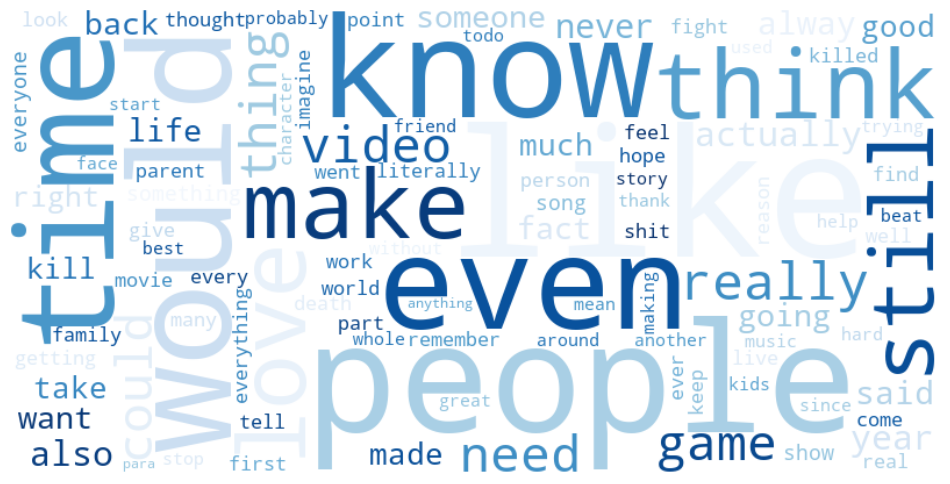

In [90]:
# Combine all the comments into a single string
text = ' '.join(Negative_comments)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100, colormap='Blues').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

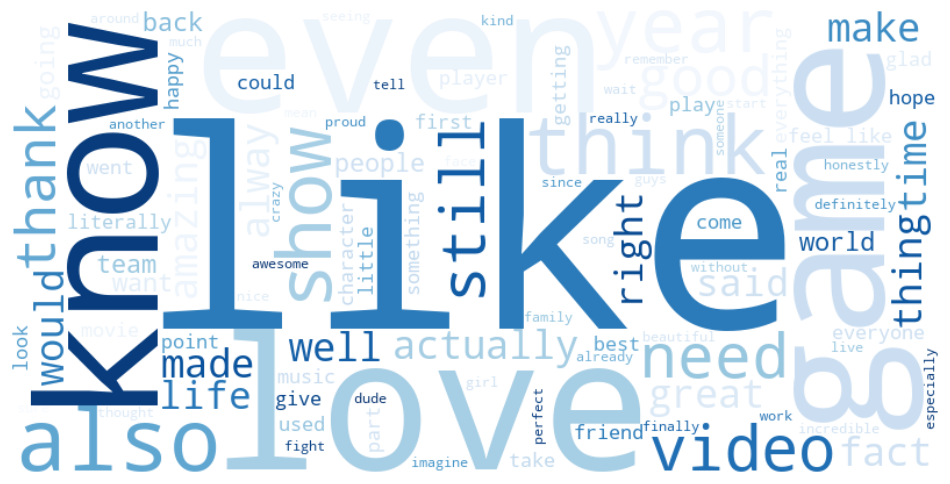

In [89]:
# Combine all the comments into a single string
text = ' '.join(Positive_comments)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100, colormap='Blues').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Model Building

In [114]:
# Importing necessary libraries

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
import wordcloud
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## Preparing data before building the model

In [115]:
# Group the data by video_id and select the maximum values for each column
final_trending_dated_data = data.groupby('video_id')[['trending_date', 'likes', 'view_count', 'comment_count']].max()

# Merge the maximum values dataframe with the original data based on video_id
final_df = data.merge(final_trending_dated_data, on = 'video_id', how = 'left')

# Extract year, month, and weekday from the 'publishedAt' column
final_df['Year'] = final_df['publishedAt'].dt.year
final_df['Month'] = final_df['publishedAt'].dt.month
final_df['weekday'] = final_df['publishedAt'].dt.day_name()

# Calculate the duration between the date when the video starts trending and the date when it stops trending
final_df['trendingDaysDuration'] = (final_df['trending_date_y'] - final_df['trending_date_x']).dt.days

# Remove rows where trendingDaysDuration is 0 and reset the index
final_df = final_df[final_df['trendingDaysDuration'] != 0].reset_index(drop = True)

# Drop columns that are no longer needed
df = final_df.drop(['video_id', 'title', 'publishedAt', 'tags', 'dislikes',
                    'thumbnail_link', 'description', 'trending_date_x', 'trending_date_y'], axis = 1)

# Rename columns to distinguish start and end values for views, likes, and comments
df = df.rename({'view_count_x': 'view_count_start', 'likes_x': 'likes_start', 'comment_count_x': 'comment_count_start', 
          'view_count_y': 'view_count_end', 'likes_y': 'likes_end', 'comment_count_y': 'comment_count_end'}, axis = 1)


##### Defining Column Transformer for numerical, categorical and boolean columns. We will be using the same preprocessing of data for all the prediction models

In [116]:
def get_preprocessor(X_train, y_train, X_test, y_test):
    # Selecting numerical columns
    numeric_features = X_train.select_dtypes(include = ['int64', 'float64']).columns.values
    # Applying Scaling for numberical columns
    numeric_transformer = Pipeline(
        steps=[("scaler", StandardScaler())]
    )


    # Selecting Categorical columns
    categorical_features = X_train.select_dtypes(include = ['object']).columns.values
    # Applying OneHotEncoder for categorical columns
    categorical_transformer = Pipeline(
        steps=[("encoder", OneHotEncoder(drop = 'first', handle_unknown="ignore"))]
    )


    # Selecting Boolean datatyped columns
    boolean_features = X_train.select_dtypes(include = ['bool']).columns.values
    # Applying binary encoding to those columns
    boolean_transformer = Pipeline(
        steps=[("encoder", OneHotEncoder(drop = 'if_binary', handle_unknown="ignore"))]
    )


    # Building a column transformer which applies all those above mentioned transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
            ("bool", boolean_transformer, boolean_features)
        ]
    )
    
    return preprocessor

##### Defining a function that returns metrics for regression models

In [117]:
# Define a function called metric_df that takes a model, training and testing features (X_train, X_test), 
# and training and testing target values (y_train, y_test) as inputs
def metric_df_reg(model, X_train, X_test, y_train, y_test):
    
    # Calculate the R^2 score (coefficient of determination) for the training and testing data using the 
    # trained model and the corresponding features
    train_r2 = metrics.r2_score(y_train, model.predict(X_train))
    test_r2 = metrics.r2_score(y_test, model.predict(X_test))
    
    # Calculate the mean squared error (MSE) for the training and testing data using the trained model 
    # and the corresponding features
    train_mse = metrics.mean_squared_error(model.predict(X_train), y_train)
    test_mse = metrics.mean_squared_error(model.predict(X_test), y_test)
    
    # Calculate the mean absolute error (MAE) for the training and testing data using the trained model 
    # and the corresponding features
    train_mae = metrics.mean_absolute_error(model.predict(X_train), y_train)
    test_mae = metrics.mean_absolute_error(model.predict(X_test), y_test)
    
    # Combine the calculated metrics into a 2D NumPy array called 'Metrics'
    Metrics = np.array([[train_r2, test_r2], [train_mse, test_mse], [train_mae, test_mae]])
      
    # Convert the NumPy array into a Pandas DataFrame with the appropriate column and index labels,
    # and return it
    return pd.DataFrame(Metrics, columns=['Train', 'Test'], index=['R2_score', 'Mean Squared Error', 'Mean Absolute Error'])

##### Defining a function that returns metrics for categorical models

In [118]:
def metric_df_cat(model, X_train, X_test, y_train, y_test):
    # calculate accuracy scores
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    # calculate precision scores
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))    
    
    # calculate recall scores
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))   

    # create a 2D numpy array with the calculated scores
    Metrics = np.array([[train_accuracy, test_accuracy], [train_precision, test_precision], [train_recall, test_recall]])
      
    # create and return a pandas DataFrame with the calculated scores
    return pd.DataFrame(Metrics, 
                        columns = ['Train', 'Test'], index = ['Accuracy', 'Precision', 'Recall'])

##### Defining a function that returns a plot that compares all the regression models

In [119]:
# Define Data

def compare_reg_models(models):
    train_r2 = [metrics.r2_score(model.predict(X_train), y_train) for _, model in models.items()]
    test_r2 = [metrics.r2_score(model.predict(X_test), y_test) for _, model in models.items()]

    x_axis = np.arange(len(models))*1.2

    # Multi bar Chart

    fig, ax = plt.subplots(figsize = (10, 3))

    ax.bar(x_axis + (0.20), train_r2, width=0.2, label = 'Train R2 Score')
    ax.bar(x_axis + (0.20 * 2), test_r2, width=0.2, label = 'Test R2 Score')

    for patch in ax.patches:
        ax.annotate(round(patch.get_height(),2), (patch.get_x() + 0.03, patch.get_height() + 0.0032), size = 9)

    # Xticks

    plt.xticks(x_axis + 0.3, models.keys(), rotation = 90)

    # Add legend

    plt.legend(bbox_to_anchor=(0.6, 1.25))

    # Display

    plt.grid()

    plt.show()

##### Defining a function that returns a plot that compares all the classification models

In [120]:
# Define Data

def compare_clf_models(models):
    train_accuracy = [metrics.accuracy_score(model.predict(X_train), y_train) for _, model in models.items()]
    test_accuracy = [metrics.accuracy_score(model.predict(X_test), y_test) for _, model in models.items()]

    x_axis = np.arange(len(models))*1.2

    # Multi bar Chart

    fig, ax = plt.subplots(figsize = (10, 3))

    ax.bar(x_axis + (0.20), train_accuracy, width=0.2, label = 'Train R2 Score')
    ax.bar(x_axis + (0.20 * 2), test_accuracy, width=0.2, label = 'Test R2 Score')

    for patch in ax.patches:
        ax.annotate(round(patch.get_height(),2), (patch.get_x() + 0.03, patch.get_height() + 0.0032), size = 9)

    # Xticks

    plt.xticks(x_axis + 0.3, models.keys(), rotation = 90)

    # Add legend

    plt.legend(bbox_to_anchor=(0.6, 1.25))

    # Display

    plt.grid()

    plt.show()

## Predicting the views by the time video gets out of trending list

In [121]:
# Drop the 'likes_end', 'comment_count_end', and 'trendingDaysDuration' columns from the dataframe
model_df = df.drop(columns = ['likes_end', 'comment_count_end', 'trendingDaysDuration'])

# Drop rows containing missing values in place (in the original dataframe)
model_df.dropna(inplace = True)

# Split the data into features (X) and target variable (y)
y = model_df['view_count_end']
X = model_df.drop(columns = ['view_count_end'])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, train_size = 0.8)

# Getting column transformer as a preprocessor
preprocessor = get_preprocessor(X_train, y_train, X_test, y_test)

##### Linear Regression

In [122]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
lr_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

# Training the model
lr_model_views.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor', LinearRegression())])

In [123]:
metric_df_reg(lr_model_views, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.154755e-01  8.924120e-01
Mean Squared Error   6.980298e+12  1.091192e+13
Mean Absolute Error  7.145208e+05  7.737885e+05

##### Decision Tree Regressor

In [65]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

In [67]:
# Training the model

dt_model_views.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
metric_df_reg(dt_model_views, X_train, X_test, y_train, y_test)

In [ ]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

# define hyperparameters for grid search
params = {
    'regressor__max_depth': [2, 5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# perform grid search with cross-validation
grid_search = GridSearchCV(dt_model_views, params, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [124]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("regressor", DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 4, min_samples_split = 10))]
)

In [125]:
# Training the model

dt_model_views.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=10))])

In [126]:
metric_df_reg(dt_model_views, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.283908e-01  8.603468e-01
Mean Squared Error   5.913712e+12  1.416409e+13
Mean Absolute Error  7.307292e+05  8.334669e+05

##### XGBoost

In [ ]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor())]
)

In [ ]:
# Training the model

xgb_model_views.fit(X_train, y_train)

In [ ]:
metric_df_reg(xgb_model_views, X_train, X_test, y_train, y_test)

In [ ]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor())]
)

# Defining the hyperparameters for the GridSearchCV
params = {
    'regressor__max_depth': [2, 5, 10],
    'regressor__n_estimators': [50, 100, 200]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(xgb_model_views, params, cv=5)

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [127]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_views = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor(max_depth = 5, n_estimators = 200))]
)

In [128]:
# Training the model

xgb_model_views.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [129]:
metric_df_reg(xgb_model_views, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.759321e-01  9.141446e-01
Mean Squared Error   1.987601e+12  8.707737e+12
Mean Absolute Error  5.907959e+05  7.024638e+05

##### Compare model metrics

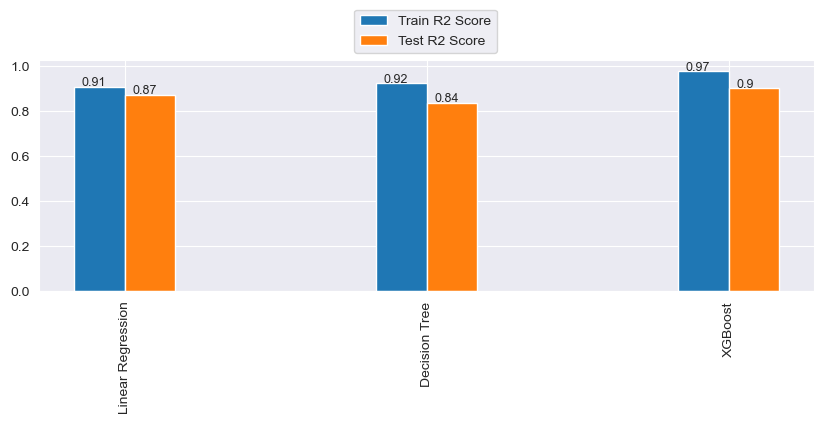

In [130]:
# Define Data

models = {'Linear Regression': lr_model_views, 'Decision Tree': dt_model_views, 'XGBoost': xgb_model_views}

compare_reg_models(models)

In [139]:
import plotly.graph_objs as go

def compare_reg_models(models):
    train_r2 = [metrics.r2_score(model.predict(X_train), y_train) for _, model in models.items()]
    test_r2 = [metrics.r2_score(model.predict(X_test), y_test) for _, model in models.items()]

    x_axis = np.arange(len(models))*1.2

    # Multi bar Chart

    fig = go.Figure()

    fig.add_trace(go.Bar(x=x_axis , y=train_r2, width=0.2, name='Train R2 Score'))
    fig.add_trace(go.Bar(x=x_axis + (0.20), y=test_r2, width=0.2, name='Test R2 Score'))


    # Xticks
    #fig.update_layout(
      #  xaxis=dict(tickmode='array', tickvals=x_axis, ticktext=models.keys(), tickangle=90)
    #)

    # Add legend
    #fig.update_layout(
       # legend=dict(x=0.6, y=1.25)
    #)

    # Display
    #fig.update_layout(
       # grid=dict()
    #)

    fig.show()


In [140]:
# Define Data

models = {'Linear Regression': lr_model_views, 'Decision Tree': dt_model_views, 'XGBoost': xgb_model_views}

compare_reg_models(models)

## Predicting the likes by the time video gets out of trending list

In [76]:
# Drop the 'likes_end', 'comment_count_end', and 'trendingDaysDuration' columns from the dataframe
model_df = df.drop(columns = ['view_count_end', 'comment_count_end', 'trendingDaysDuration'])

# Drop rows containing missing values in place (in the original dataframe)
model_df.dropna(inplace = True)

# Split the data into features (X) and target variable (y)
y = model_df['likes_end']
X = model_df.drop(columns = ['likes_end'])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, train_size = 0.8)

# Getting column transformer as a preprocessor
preprocessor = get_preprocessor(X_train, y_train, X_test, y_test)

##### Linear Regression

In [77]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
lr_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

# Training the model
lr_model_likes.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor', LinearRegression())])

In [78]:
metric_df_reg(lr_model_likes, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.543719e-01  9.462647e-01
Mean Squared Error   1.053780e+10  1.290567e+10
Mean Absolute Error  2.264603e+04  2.376981e+04

##### Decision Tree Regressor

In [89]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

In [90]:
# Training the model

dt_model_likes.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor', DecisionTreeRegressor())])

In [91]:
metric_df_reg(dt_model_likes, X_train, X_test, y_train, y_test)

Train          Test
R2_score               1.0  9.218149e-01
Mean Squared Error     0.0  1.877781e+10
Mean Absolute Error    0.0  2.329598e+04

In [92]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

# define hyperparameters for grid search
params = {
    'regressor__max_depth': [2, 5, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 4]
}

# perform grid search with cross-validation
grid_search = GridSearchCV(dt_model_likes, params, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5}
Best score:  0.939998397006873


In [79]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("regressor", DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 4, min_samples_split = 5))]
)

In [80]:
# Training the model

dt_model_likes.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=4,
                                       min_samples_split=5))])

In [82]:
metric_df_reg(dt_model_likes, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.536844e-01  9.294117e-01
Mean Squared Error   1.069659e+10  1.695327e+10
Mean Absolute Error  3.191532e+04  3.313710e+04

##### XGBoost

In [97]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor())]
)

In [98]:
# Training the model

xgb_model_likes.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [99]:
metric_df_reg(xgb_model_likes, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.915391e-01  9.558709e-01
Mean Squared Error   1.954035e+09  1.059854e+10
Mean Absolute Error  1.762239e+04  2.094527e+04

In [100]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor())]
)

# Defining the hyperparameters for the GridSearchCV
params = {
    'regressor__max_depth': [2, 5, 10],
    'regressor__n_estimators': [50, 100, 200]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(xgb_model_likes, params, cv=5)

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best score:  0.9634450963495969


In [128]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_likes = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor(max_depth = 5, n_estimators = 200))]
)

In [129]:
# Training the model

xgb_model_likes.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [130]:
metric_df_reg(xgb_model_likes, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.920446e-01  9.606126e-01
Mean Squared Error   1.837290e+09  9.459728e+09
Mean Absolute Error  1.723064e+04  2.063808e+04

##### Compare model metrics

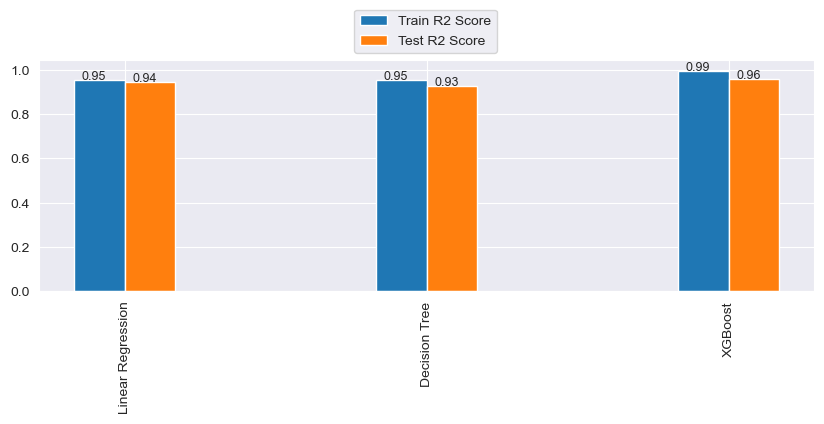

In [105]:
# Define Data

models = {'Linear Regression': lr_model_likes, 'Decision Tree': dt_model_likes, 'XGBoost': xgb_model_likes}

compare_reg_models(models)

## Predicting the comment_count by the time video gets out of trending list

In [191]:
# Drop the 'likes_end', 'comment_count_end', and 'trendingDaysDuration' columns from the dataframe
model_df = df.drop(columns = ['view_count_end', 'likes_end', 'trendingDaysDuration'])

# Drop rows containing missing values in place (in the original dataframe)
model_df.dropna(inplace = True)

# Split the data into features (X) and target variable (y)
y = model_df['comment_count_end']
X = model_df.drop(columns = ['comment_count_end'])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, train_size = 0.8)

# Getting column transformer as a preprocessor
preprocessor = get_preprocessor(X_train, y_train, X_test, y_test)

##### Linear Regression

In [107]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
lr_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

# Training the model
lr_model_comments.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor', LinearRegression())])

In [108]:
metric_df_reg(lr_model_comments, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.641084e-01  9.719002e-01
Mean Squared Error   3.346787e+08  2.776333e+08
Mean Absolute Error  1.894466e+03  1.866476e+03

##### Decision Tree Regressor

In [109]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

In [110]:
# Training the model

dt_model_comments.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor', DecisionTreeRegressor())])

In [111]:
metric_df_reg(dt_model_comments, X_train, X_test, y_train, y_test)

Train          Test
R2_score               1.0  9.612861e-01
Mean Squared Error     0.0  3.825030e+08
Mean Absolute Error    0.0  1.287827e+03

In [112]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", DecisionTreeRegressor())]
)

# define hyperparameters for grid search
params = {
    'regressor__max_depth': [2, 5, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 4]
}

# perform grid search with cross-validation
grid_search = GridSearchCV(dt_model_comments, params, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5}
Best score:  0.9643141022688597


In [113]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("regressor", DecisionTreeRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 5))]
)

In [114]:
# Training the model

dt_model_comments.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('regressor', DecisionTreeRegressor(min_samples_split=5))])

In [115]:
metric_df_reg(dt_model_comments, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.969335e-01  9.759931e-01
Mean Squared Error   2.859435e+07  2.371940e+08
Mean Absolute Error  2.276574e+02  1.231065e+03

##### XGBoost

In [116]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1))]
)

In [117]:
# Training the model

xgb_model_comments.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [118]:
metric_df_reg(xgb_model_comments, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.933946e-01  9.700448e-01
Mean Squared Error   6.159322e+07  2.959647e+08
Mean Absolute Error  1.319788e+03  1.416354e+03

In [119]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor())]
)

# Defining the hyperparameters for the GridSearchCV
params = {
    'regressor__max_depth': [2, 5, 10],
    'regressor__n_estimators': [50, 100, 200]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(xgb_model_comments, params, cv=5)

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best score:  0.9677510573788481


In [123]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_comments = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", xgb.XGBRegressor(max_depth = 5, n_estimators = 200))]
)

In [124]:
# Training the model

xgb_model_comments.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [125]:
metric_df_reg(xgb_model_likes, X_train, X_test, y_train, y_test)

Train          Test
R2_score             9.992700e-01  9.756334e-01
Mean Squared Error   6.806640e+06  2.407482e+08
Mean Absolute Error  8.915970e+02  1.218626e+03

##### Compare model metrics

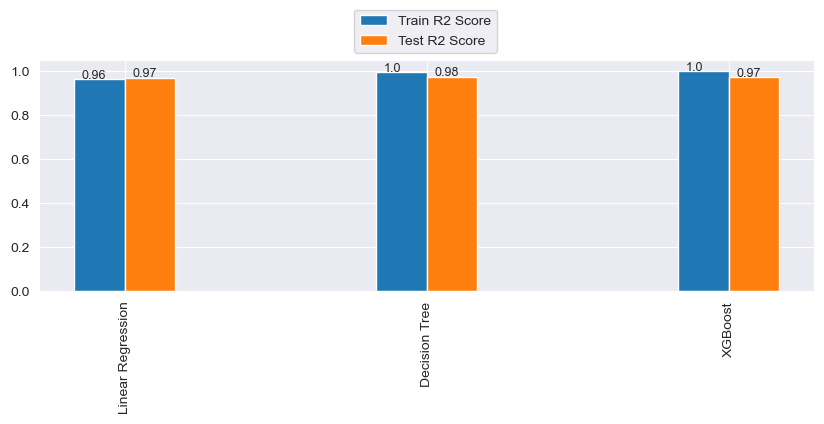

In [126]:
# Define Data

models = {'Linear Regression': lr_model_comments, 'Decision Tree': dt_model_comments, 'XGBoost': xgb_model_comments}

compare_reg_models(models)

## Predicting the number of trending days

In [176]:
# Drop the 'likes_end', 'comment_count_end', and 'trendingDaysDuration' columns from the dataframe
model_df = df.drop(columns = ['likes_end', 'comment_count_end', 'view_count_end'])

# Drop rows containing missing values in place (in the original dataframe)
model_df.dropna(inplace = True)

# Split the data into features (X) and target variable (y)
trendingdays = model_df['trendingDaysDuration']
model_df['trendingDaysDuration'] = model_df['trendingDaysDuration'].apply(lambda x: 0 if (x < 5) else 1)
y = model_df['trendingDaysDuration']
X = model_df.drop(columns = ['trendingDaysDuration'])

# Save the column names of the features in the variable 'columns'
columns = X.columns

# Use the trained linear regression models to predict the 'likes_end', 'comment_count_end', and 'view_count_end' 
# values for the features in X, and add these estimates as new columns to X
X['likes_end_estimate'] = xgb_model_likes.predict(X[columns])
X['comment_count_estimate'] = dt_model_comments.predict(X[columns])
X['view_count_estimate'] = xgb_model_views.predict(X[columns])

# Split the data into training and testing sets for model evaluation, with a train size of 0.8 and a random seed of 50
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, train_size = 0.8)

# Getting column transformer as a preprocessor
preprocessor = get_preprocessor(X_train, y_train, X_test, y_test)

##### Logistic Regression

In [177]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
lr_model_trending = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

# Training the model
lr_model_trending.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month', 'comment_count_estimate'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('classifier', LogisticRegression())])

In [178]:
metric_df_cat(lr_model_trending, X_train, X_test, y_train, y_test)

Train      Test
Accuracy   0.820242  0.809768
Precision  0.745988  0.500000
Recall     0.105434  0.051451

##### Decision Tree Classifier

In [179]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
dt_model_trending = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

In [180]:
# Training the model

dt_model_trending.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month', 'comment_count_estimate'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'categoryId', 'weekday'], dtype=object)),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['comments_disabled', 'ratings_disabled'], dtype=object))])),
                ('classifier', DecisionTreeClassifier())])

In [181]:
metric_df_cat(dt_model_trending, X_train, X_test, y_train, y_test)

Train      Test
Accuracy   0.999934  0.786522
Precision  1.000000  0.405638
Recall     0.999658  0.262646

##### XGBoost

In [182]:
# Let's use Linear regression model and Pipeline the preprocessing and lr model
xgb_model_trending = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb.XGBClassifier())]
)

In [183]:
# Training the model

xgb_model_trending.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['view_count_start', 'likes_start', 'comment_count_start', 'Year',
       'Month', 'comment_count_estimate'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['channelTitle', 'cat...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [184]:
metric_df_cat(xgb_model_trending, X_train, X_test, y_train, y_test)

Train      Test
Accuracy   0.870313  0.807123
Precision  0.806349  0.476825
Recall     0.432606  0.143056

##### Compare model metrics

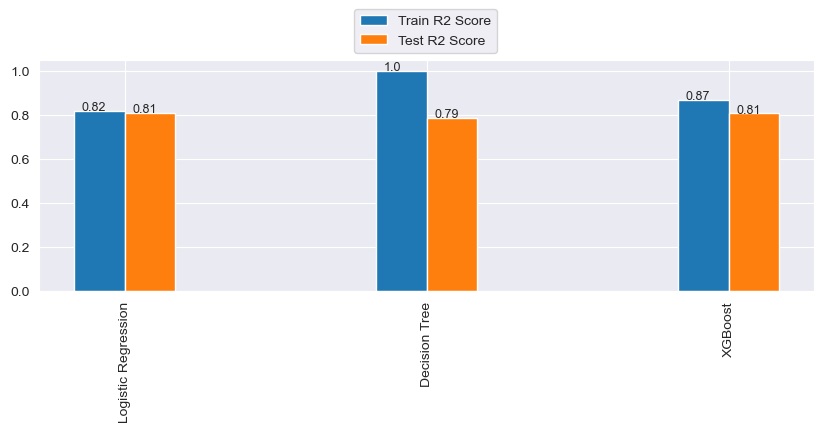

In [185]:
# Define Data

models = {'Logistic Regression': lr_model_trending, 'Decision Tree': dt_model_trending, 'XGBoost': xgb_model_trending}

compare_clf_models(models)

## Saving the models

In [186]:
import joblib

# Model for predicting views
joblib.dump(xgb_model_views, "./models/predict_views.pkl")

# Model for predicting likes
joblib.dump(xgb_model_likes, "./models/predict_likes.pkl")

# Model for predicting comments count
joblib.dump(dt_model_comments, "./models/predict_commentcount.pkl")

# Model for predicting trending days
joblib.dump(xgb_model_trending, "./models/predict_trendingdays.pkl")

['./models/predict_trendingdays.pkl']